## Initial Parameters

In [3]:
INPUT_DIR = '../../data/generated_data/model_progan_2022.05.13.13.43.18'
p = 0.5928
L = 128

In [12]:
import os
import glob
import numpy as np
import geometric_measure
import matplotlib.pyplot as plt

if not os.path.exists(INPUT_DIR):
    print('There is no such path:', INPUT_DIR)
filelist = glob.glob(INPUT_DIR + '/' + f'fake_L={L}_p={p}_*.npy')

#import importlib
#importlib.reload(geometric_measure)   

# Clustering the Input Images

TypeError: Invalid shape () for image data

<Figure size 432x288 with 0 Axes>

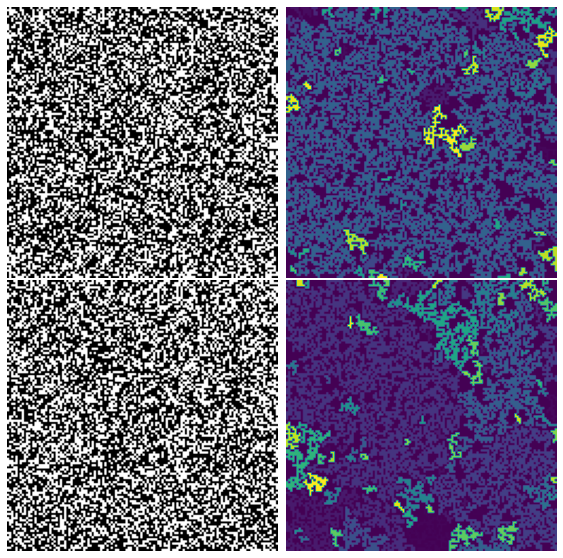

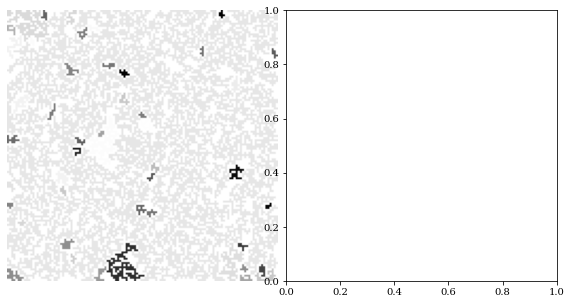

In [13]:
n_samples = 2
imgs_fake = [np.load(path) for path in filelist[:n_samples]]
np.random.seed(72)
imgs_real = [ (np.random.random(size=(L,L)) < p).astype(int) for i in range(n_samples) ]

def plot_imgs_labels(imgs, labels, outfilename):
    nrows = len(imgs)
    plt.figure(figsize=(2*5, nrows*5))
    plt.subplots_adjust(wspace=0, hspace=0.01)
    
    for i, img in enumerate(imgs):
        plt.subplot(nrows, 2, 2*i + 1)
        plt.imshow(img, cmap='Greys',)
        plt.axis('off')
        plt.subplot(nrows, 2, 2*i + 2)
        label = labels[i]
        plt.imshow(label,)
        plt.axis('off')
    if outfilename:
        plt.savefig(outfilename, pad_inches=0.05, bbox_inches='tight') #

# now plot some samples
plt.figure(1)
labels_real, _ = geometric_measure.clustering(imgs_real, lower_size=5)
plot_imgs_labels(imgs_real, labels_real, outfilename=None)

plt.figure(2)
labels_fake, _ = geometric_measure.clustering(imgs_fake, lower_size=5)
plot_imgs_labels(imgs_fake, labels_fake, outfilename=None)

# Statistics

In [8]:
import fit 
def logplotXY(plt, x, y, xlabel, ylabel):
    plt.loglog(x, y, ls='', marker='o', fillstyle='none',
               label = 'sim')

    # plot slope
    indx = (x > 10) & (x <= 1e3)
    x, y = x[indx], y[indx]
    expo, c, expo_err, c_err = fit.loglog_slope(x, y)
    xn = np.logspace(np.log10(x[0]), np.log10(x[-1]))
    yn = c * xn ** expo
    plt.loglog(xn, yn, color='k',
               label = fr'$\tau={-expo:.2f} \pm {expo_err:.2f}$'  )

    if xlabel:
        plt.xlabel('$s$', fontsize=16)
    if ylabel:
        plt.ylabel('$n(s)$', fontsize=16)

## Real images

In [9]:
n_samples = 1000
np.random.seed(72)
imgs_real = [ (np.random.random(size=(L,L)) < p).astype(int) for i in range(n_samples) ]

# get the mesures related to the configurations
measure_real = geometric_measure.get_measure(imgs_real)
# get the statistics of measures
stat_real = geometric_measure.measure_statistics(measure_real, nbins_for_ns=43)

100%|██████████| 1000/1000 [01:25<00:00, 11.76it/s]


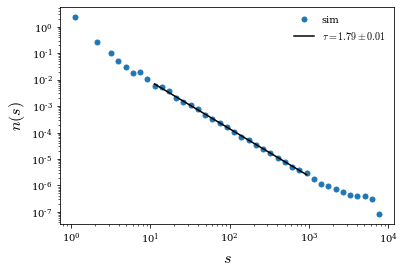

In [34]:

ns = stat_real['ns']
x, y, dx = ns['bin_centers'], ns['hist'], ns['bin_sizes']
logplotXY(plt, x, y, '$s$', '$n(s)$')

## Fake images

In [35]:
n_samples = 1000
imgs_fake = [np.load(path) for path in filelist[:n_samples]]
measure_fake = geometric_measure.get_measure(imgs_fake)
stat_fake = geometric_measure.measure_statistics(measure_fake, nbins_for_ns=43)

100%|██████████| 1000/1000 [01:28<00:00, 11.25it/s]
